Licensed to the Apache Software Foundation (ASF) under one
or more contributor license agreements.  See the NOTICE file
distributed with this work for additional information
regarding copyright ownership.  The ASF licenses this file
to you under the Apache License, Version 2.0 (the
"License"); you may not use this file except in compliance
with the License.  You may obtain a copy of the License at

  http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing,
software distributed under the License is distributed on an
"AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
KIND, either express or implied.  See the License for the
specific language governing permissions and limitations
under the License.

# Statistical Plots

In [1]:
import os
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

In [2]:
def bar_plot_pourcentage_perfmax(u, label_methods, our_bins, save_bool, namesave):
    u_normal = u / np.max(u, 1, keepdims=1)

    u_rank = [st.rankdata(-u[i], method='min') for i in range(np.shape(u)[0])]
    
    fig, axes = plt.subplots(figsize=(18, 7.5), nrows=1, ncols=2)
    ax0, ax1 = axes.flatten()

    ax0.hist(np.array(u_rank), our_bins, density=1, histtype='bar', label=label_methods)
    ax0.legend(prop={'size': 12})
    ax0.set_title('Rank histogram')
    
    ax1.boxplot(u_normal, labels=label_methods)
    ax1.set_title('Boxplot of the ratio to the max performance')
    
    plt.show()
    if save_bool:
        fig.savefig(namesave, format='eps')

### Applied to results on UCR

In [3]:
import csv

with open('results_ucr.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file) 
    
    i=0
    score=[]
    labels_datasets = []
    for line in csv_reader:
        if i == 0:
            labels_methods = line[2:-3]
        else:
            labels_datasets.append(line[0])
            score.append([float(x) for x in line[2:-3]])
        i += 1
        if i == 85:
            break
    
score = np.array(score)

# Define submatrix with our_scores, and scores_for_comparison
score_ours = score[:, 0:6]
labels_our_methods = labels_methods[:5] + list([labels_methods[6]])

score_comparison  = score[:, [4, 7, 8, 9, 10, 11]]
labels_comparison = [labels_methods[4]] + list(labels_methods[7:])

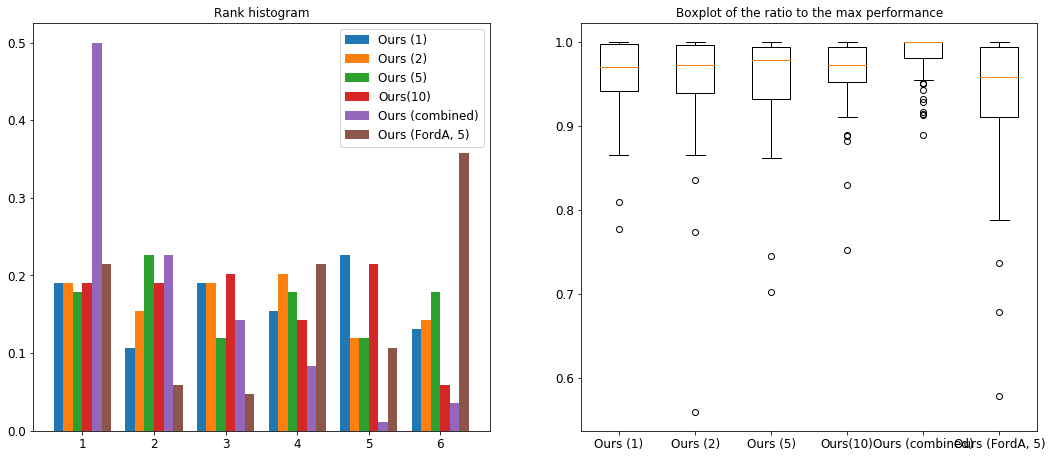

In [4]:
label_methods = labels_our_methods
our_bins = [k+0.5 for k in range(len(label_methods)+1)] 

bar_plot_pourcentage_perfmax(score_ours, label_methods, our_bins, 1, 'Our_methods_plot.eps')

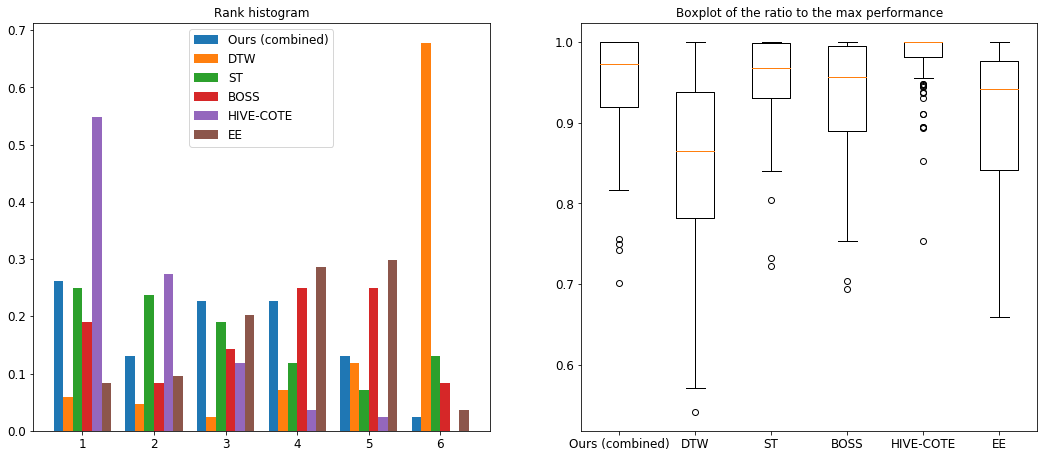

In [5]:
label_methods = labels_comparison
our_bins = [k+0.5 for k in range(len(labels_comparison)+1)]

bar_plot_pourcentage_perfmax(score_comparison[:, [0, 5, 2, 3, 1, 4]], [label_methods[i] for i in [0, 5, 2, 3, 1, 4]], our_bins, 1, 'Comparison_to_other_methods.eps')

Interpretation:
  - right plot : our method has the second-to-best median when we look at perf / max_perf.
  - left plot : our method is the best ranked in 26% of the cases (22/85) (COTE: 54%, ST: 25%).